<a href="https://colab.research.google.com/github/ElectronicDavid/AirbnbNewYork/blob/main/Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de Estudio**: Airbnb en la Ciudad de New York
**Autor**: David Vargas Quintero

**Contexto**: Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de negocio**: Realizar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cual es la variable o caracteristica más relevante para determinar el precio de un hospedaje en Airbnb?

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install --upgrade Pillow

In [ ]:
!pip install fastcore -U

Importación de librerias a utilizar:

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive

Se importan los datos

In [ ]:
# Se añade el drive
drive.mount('/content/drive')

# Se define el directorio padre
os.chdir(
     '/content/drive/MyDrive/Datos')
#     )

ruta = "/content/drive/MyDrive/Datos/listings.csv"

Mounted at /content/drive


In [ ]:
data = pd.read_csv(ruta, sep=",",error_bad_lines=False)
data.head()


<ipython-input-4-aad20592ebdd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(ruta, sep=",",error_bad_lines=False)


id                                               name  host_id  \
0  2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
1  5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
2  6848  Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...    15991   
3  6872  Condo in New York · 1 bedroom · 1 bed · 1 shar...    16104   
4  7064  Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...    17297   

       host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0       Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1          Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2  Allen & Irina            Brooklyn        Williamsburg  40.70935  -73.95342   
3            Kae           Manhattan         East Harlem  40.80107  -73.94255   
4         Joelle            Brooklyn        Williamsburg  40.71248  -73.95881   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    240              30                 49  2022-06-21   
1     Private room     66              30                 50  2019-12-02   
2  Entire home/apt     81              30                191  2023-08-14   
3     Private room     65              30                  1  2022-06-05   
4     Private room     95              30                 13  2022-09-12   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.29                               3               351   
1               0.29                               2               151   
2               1.09                               1                79   
3               0.06                               2               295   
4               0.08                               2                26   

   number_of_reviews_ltm license  
0                      0     NaN  
1                      0     NaN  
2                      5     NaN  
3                      0     NaN  
4                      0     NaN

In [ ]:
#Detección
data.shape

(38792, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38792 non-null  int64  
 1   name                            38792 non-null  object 
 2   host_id                         38792 non-null  int64  
 3   host_name                       38787 non-null  object 
 4   neighbourhood_group             38792 non-null  object 
 5   neighbourhood                   38792 non-null  object 
 6   latitude                        38792 non-null  float64
 7   longitude                       38792 non-null  float64
 8   room_type                       38792 non-null  object 
 9   price                           38792 non-null  int64  
 10  minimum_nights                  38792 non-null  int64  
 11  number_of_reviews               38792 non-null  int64  
 12  last_review                     

Gracias a la función data.info() podemos tener un detalle de los campos pertenicientes a dataset:


1. ID, númerico.
2. Name, objeto, el cual debe separar también
3. Host_ID, int, número de identificador del dueño del inmueble
4. Host_Name,objeto,  Nombre del dueño del inmueble
5. Neighbourhood_Group: objeto, Nombre del barrio
6. Latitud, flotante, ubicación del barrio
7. Longuitud, flotante, ubicación del barrio
8. Tipo de Cuarto, objeto, tipo de alojamiento
9. Precio, int, en dolares
10. Noches Minimas, int, Número de noches minimas para arrendar
11. Numero de Reviews, int, número de calificacione obtenidas
12. último Review, objeto, fecha de último review
13. Reviews por mes: objeto, número de reviews al mes
14. Host Calculados, int, número de Host calculados por inmueble
15. Disponibilidad 365, int, número de dias disponibles en el año
16. Licencia, objeto,lícencia del inmueble


In [ ]:
# Analisís de datos:
#1. Variables Númericas
num_var = ['id,','host_id','latitude', 'longitude', 'price','minimum_nights','number_of_reviews''reviews_per_month ', 'calculated_host_listings_count','availability_365 ',' number_of_reviews_ltm']

 #2 Variables Categorias

cat_var = ['name','host_name','neighbourhood_group','neighbourhood','room_type','last_review','license ']

#Se convierten las variables categóricas en objetc
#for var in cat_var:
#    data[var] = data[var].astype('Object)
#No implementador por ahora

In [ ]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10352
reviews_per_month                 10352
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35853
dtype: int64

Se evidencia que License, Last Review, y Reviws per month tiene datos vacios, por lo que no

generará valor usar estos estádisctivos para llegar a conclusiones. dsadsdasddjj                      hijh

Dado que la columna 'Name' tiene más datos separados con un punto "·" por efectos del ejercicio, separe la columna, y trate de nombrar las columnas que este contenida:

In [ ]:
print(data['name'])

0        Rental unit in New York · ★4.68 · Studio · 1 b...
1        Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...
2        Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...
3        Condo in New York · 1 bedroom · 1 bed · 1 shar...
4        Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...
                               ...                        
38787    Rental unit in Brooklyn · ★New · 1 bedroom · 1...
38788    Rental unit in New York · ★New · 1 bedroom · 1...
38789    Rental unit in New York · ★New · 1 bedroom · 1...
38790    Rental unit in New York · ★New · 3 bedrooms · ...
38791    Rental unit in New York · ★New · 1 bedroom · 1...
Name: name, Length: 38792, dtype: object


In [ ]:
#Se exporta variable Name para poder separarla en un futuro
arreglo0 = 0
arreglo1 = 0
arreglo2 = 0
arreglo3 = 0
arreglo4 = 0
i= 0
tamanoxfila = []

while i <= data.shape[0]-1:
      tamanoxfila.append(len(str(data['name'].iloc[i]).split("·")))
      i = i+1

##Prueba Unitaria Personal
#while i < :
#    Caracteristicas = str(data['name'].iloc[i]).split("·")
#   print(Caracteristicas)
#    i = i+1



In [ ]:
i= 0
name_separation = {'Where':[],
                   'Stars':[],
                   'Type':[],
                   'Number of Beds':[],
                   'Number of baths':[]}

name_sep_tab = pd.DataFrame(name_separation)
arregloespejo = ['1','2','3','4','5']

while i <= data.shape[0]-1:
      arreglo = str(data['name'].iloc[i]).split("·")

      try:
           if len(arreglo) < 5:
             arregloespejo[0] =arreglo[0]
             arregloespejo[1] =arreglo[1]
             arregloespejo[2] =arreglo[2]
             arregloespejo[3] =arreglo[3]
             arregloespejo[4] =""
           else:
             arregloespejo = arreglo
      except IndexError:
             print("Se ignora")

      nueva_fila = {'Where': arregloespejo[0],
                   'Stars':arregloespejo[1],
                   'Type':arregloespejo[2],
                   'Number of Beds':arregloespejo[3],
                   'Number of baths':arregloespejo[4]}
      name_sep_tab = name_sep_tab.append(nueva_fila,ignore_index=True)
      i = i+1


i = 0
#print(data.shape[0])
#arreglo = str(data['name'].iloc[2]).split("·")

#print((str(data['name'].iloc[0]).split("·")))
##print((str(data['name'].iloc[1]).split("·")))
#print((str(data['name'].iloc[2]).split("·")))

name_sep_tab.head()
#No se imprime su ejecución dado a que es bastante, y no deja ver las soluciones de abajo


In [ ]:
#Se observa que los datos todavía no están ordenados, por favor fijarse en la fila "3"
name_sep_tab.head()

Where        Stars          Type  Number of Beds  \
0  Rental unit in New York        ★4.68        Studio           1 bed    
1  Rental unit in Brooklyn        ★4.52     1 bedroom            1 bed   
2  Rental unit in Brooklyn        ★4.58    2 bedrooms           1 bed    
3        Condo in New York    1 bedroom         1 bed    1 shared bath   
4         Loft in Brooklyn        ★4.91     1 bedroom           1 bed    

  Number of baths  
0          1 bath  
1                  
2          1 bath  
3                  
4   1 shared bath

In [ ]:
name_sep_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Where            38792 non-null  object
 1   Stars            38792 non-null  object
 2   Type             38792 non-null  object
 3   Number of Beds   38792 non-null  object
 4   Number of baths  38792 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


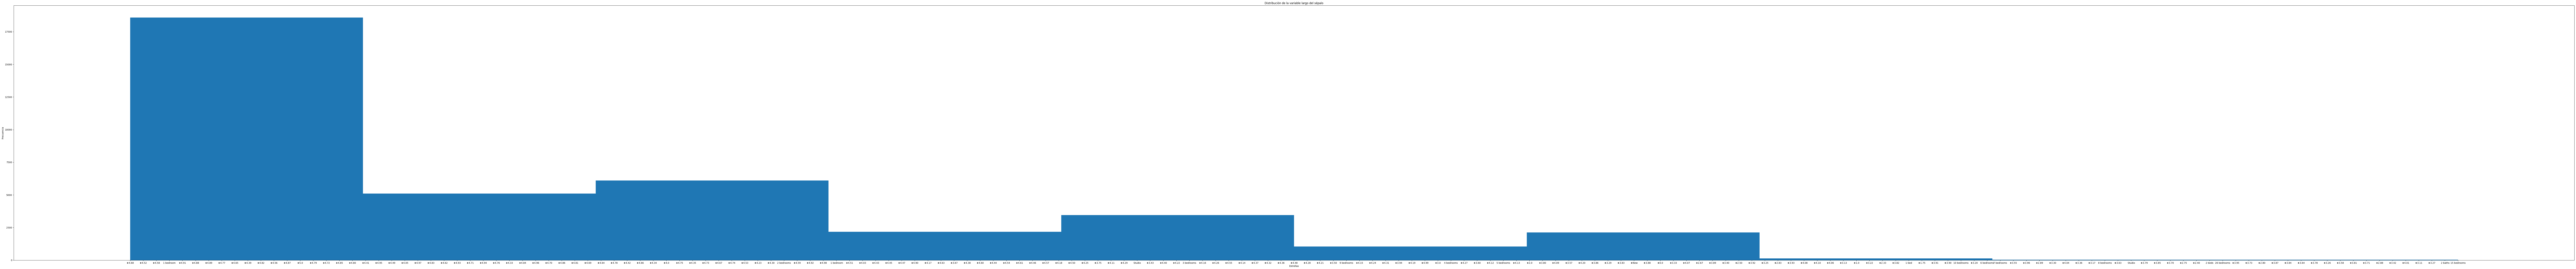

In [ ]:
plt.figure(figsize =(200,20))
plt.hist(name_sep_tab['Stars']) # Se determinar el tipo de gráfica a realizar y se pasan los datos

plt.xlabel('Estrellas') # Se añaden tantos elementos como se desee
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable largo del sépalo')
plt.show();
# ; evita que aparezca texto

In [ ]:
data['longitude'].describe()

count    38792.000000
mean       -73.945829
std          0.055115
min        -74.251907
25%        -73.982820
50%        -73.953886
75%        -73.926209
max        -73.713650
Name: longitude, dtype: float64

In [ ]:
data['latitude'].describe()

count    38792.000000
mean        40.729379
std          0.056725
min         40.500314
25%         40.688790
50%         40.726290
75%         40.762672
max         40.911380
Name: latitude, dtype: float64

Text(0, 0.5, 'Frecuencia absoluta')

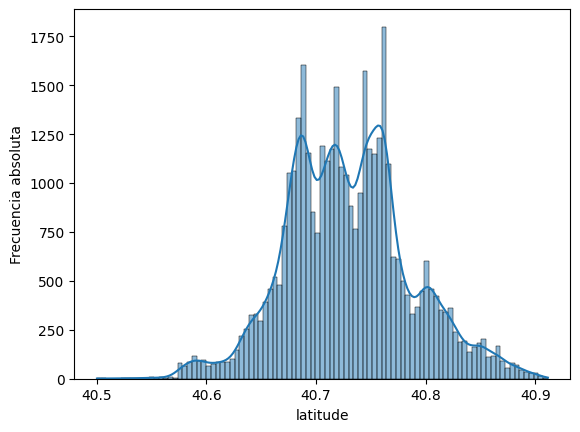

In [ ]:
#
sns.histplot(
    data = data, # Fuente de datos
    x = 'latitude', # Variable
    kde = True # Opcional, estimación de la densidad
    )

plt.ylabel('Frecuencia absoluta') # Añadir

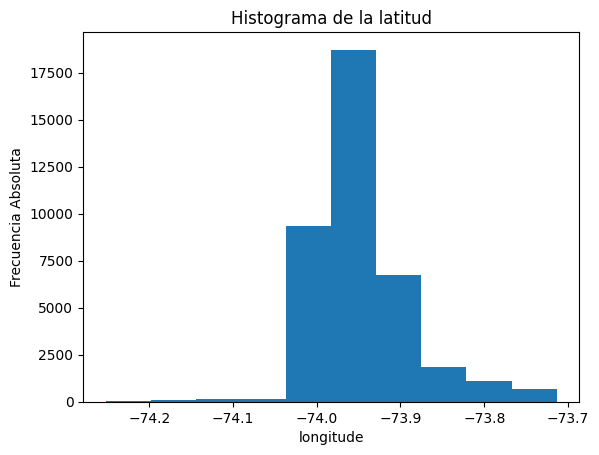

In [ ]:
plt.hist(data['longitude']) # Se determinar el tipo de gráfica a realizar y se pasan los datos

plt.xlabel('longitude') # Se añaden tantos elementos como se desee
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de la latitud')
plt.show();

In [ ]:
datos_a_exportar = data[['latitude','longitude']]
datos_a_exportar.to_csv('Ubicación.csv', index =False)

Se exportan los datos para obtener ubicación especifica de en el Componente Mapa de Power BI:

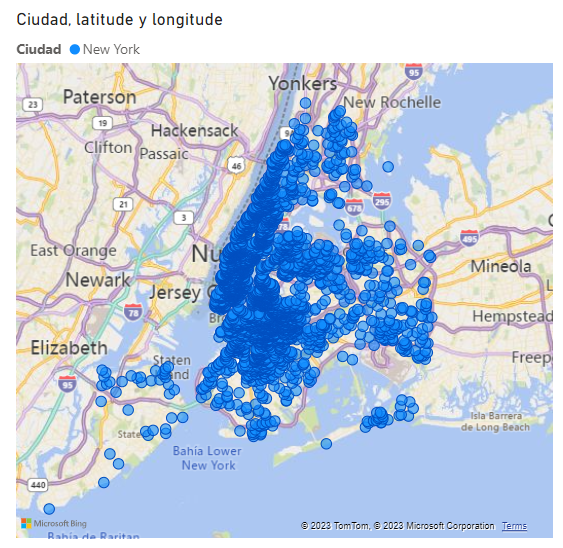

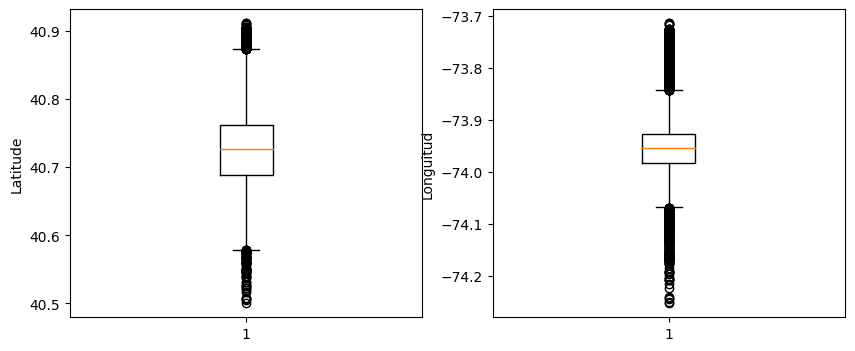

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))

ax1.boxplot(data['latitude'])
ax1.set_ylabel("Latitude")


ax2.boxplot(data['longitude'])
ax2.set_ylabel("Longuitud")
#ax2.ylabel('Longitud') # Se añaden tantos elementos como se desee

plt.show();

Se observa que la media esta ubicada en Latitud entre 40.7, y 40.8 mientras que la longuitud se ubica entre -73.9 y -74.0, cerca al "World Financial Center":

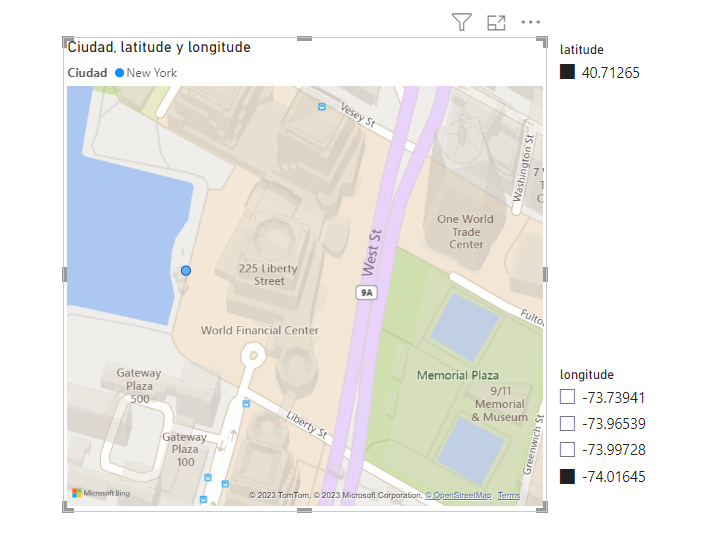

<Axes: xlabel='neighbourhood_group', ylabel='count'>

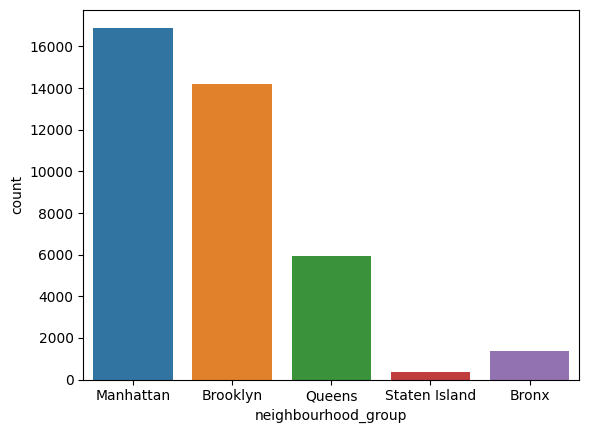

In [ ]:
#Para complementar la información anterior, se realizará un diagrama de barras para ver la cantidad de barrios reportados en los datos
sns.countplot(data = data, x ='neighbourhood_group')

Text(0, 0.5, 'Frecuencia')

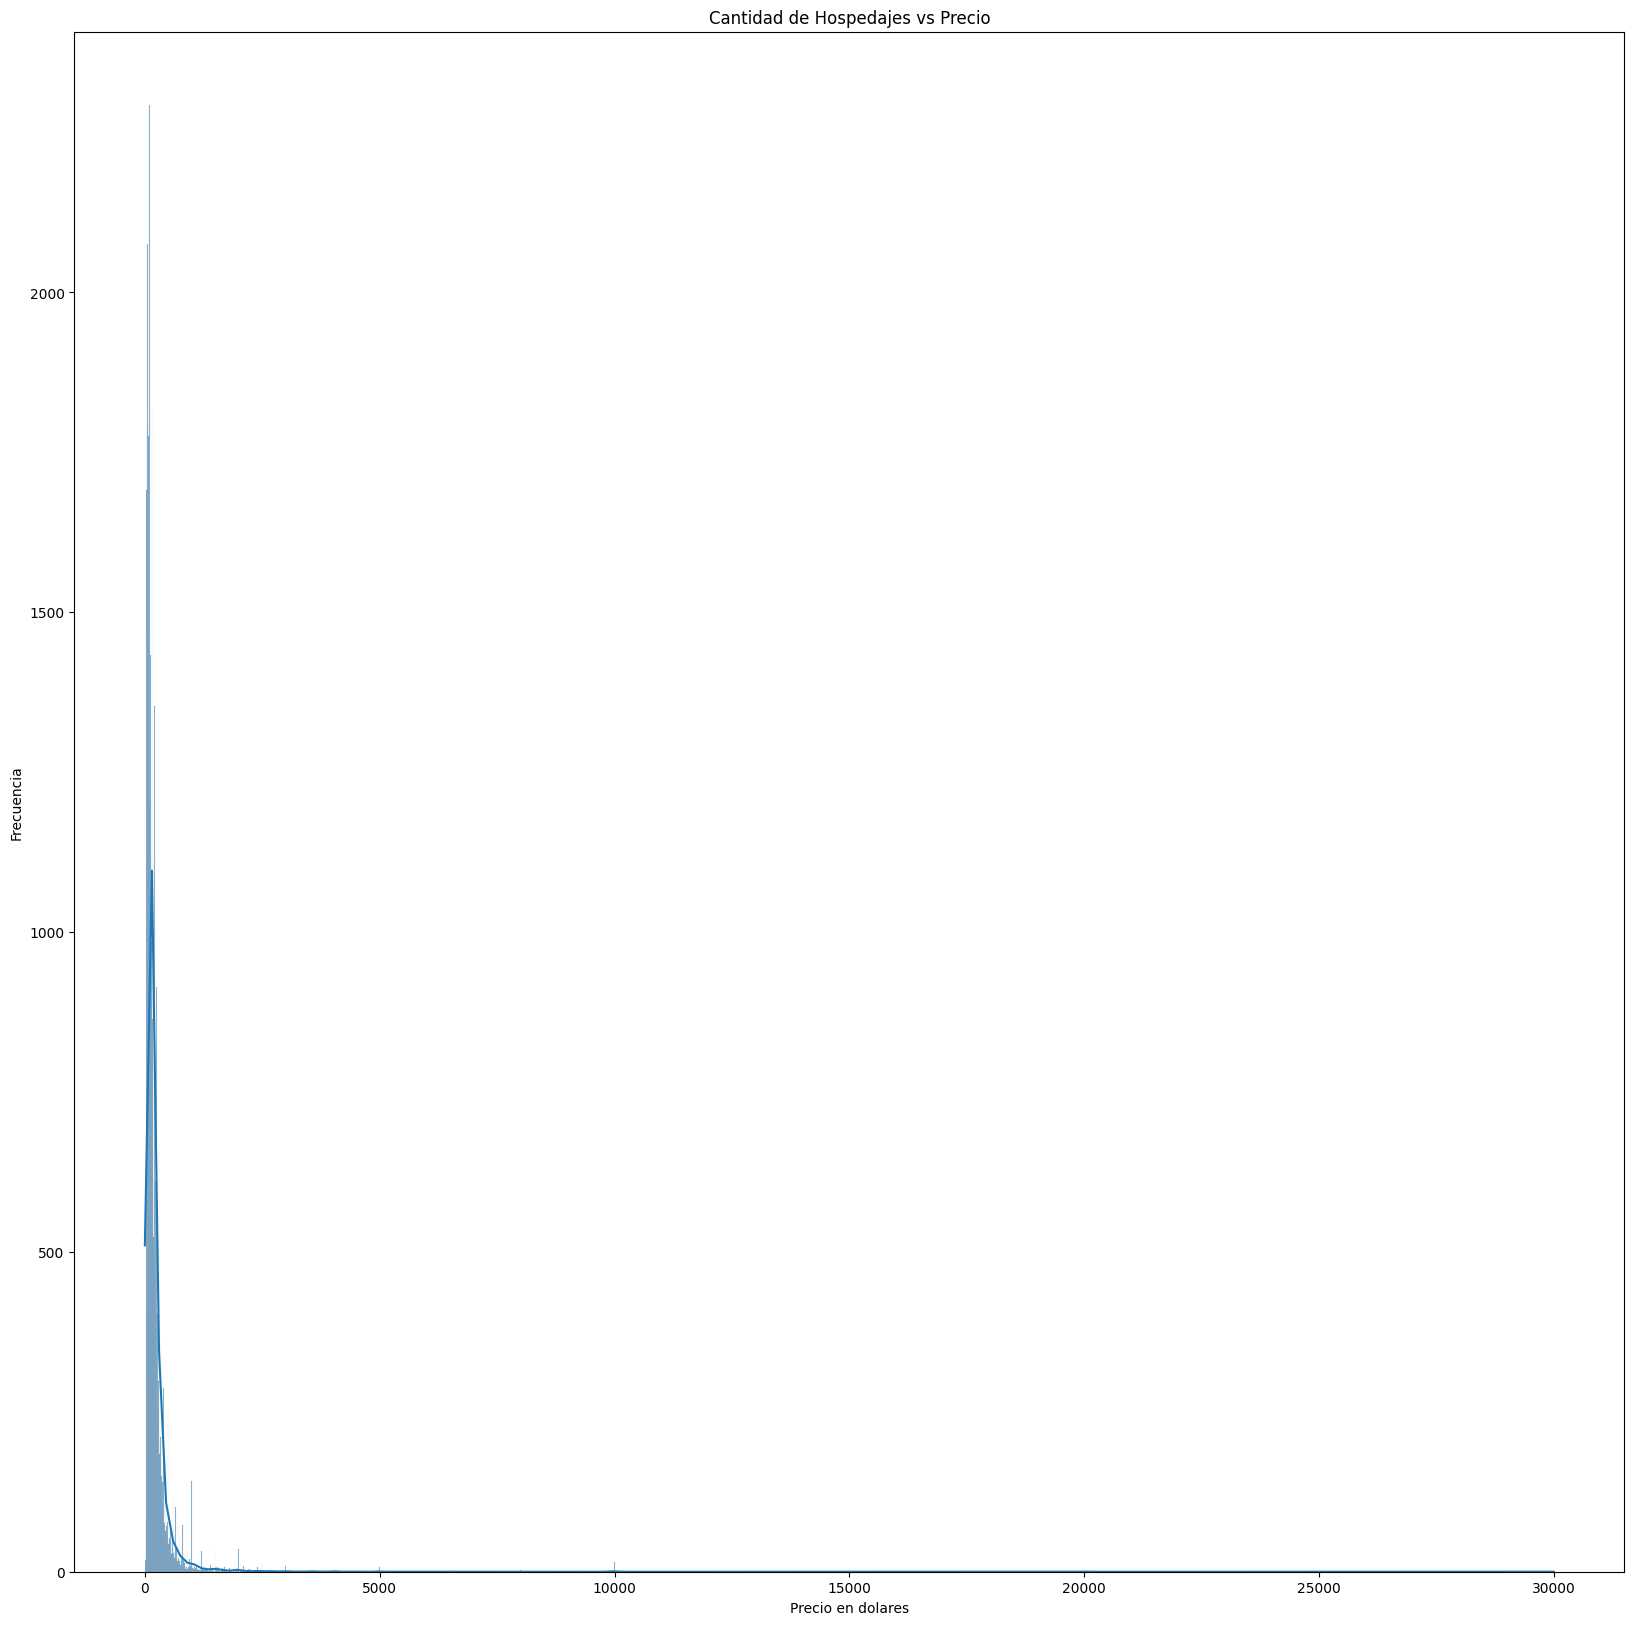

In [ ]:
plt.figure(figsize =(20,20))
sns.histplot(data = data, x = 'price' , kde = True)
plt.title('Cantidad de Hospedajes vs Precio')
plt.xlabel('Precio en dolares')
plt.ylabel('Frecuencia')

(0.0, 5000.0)

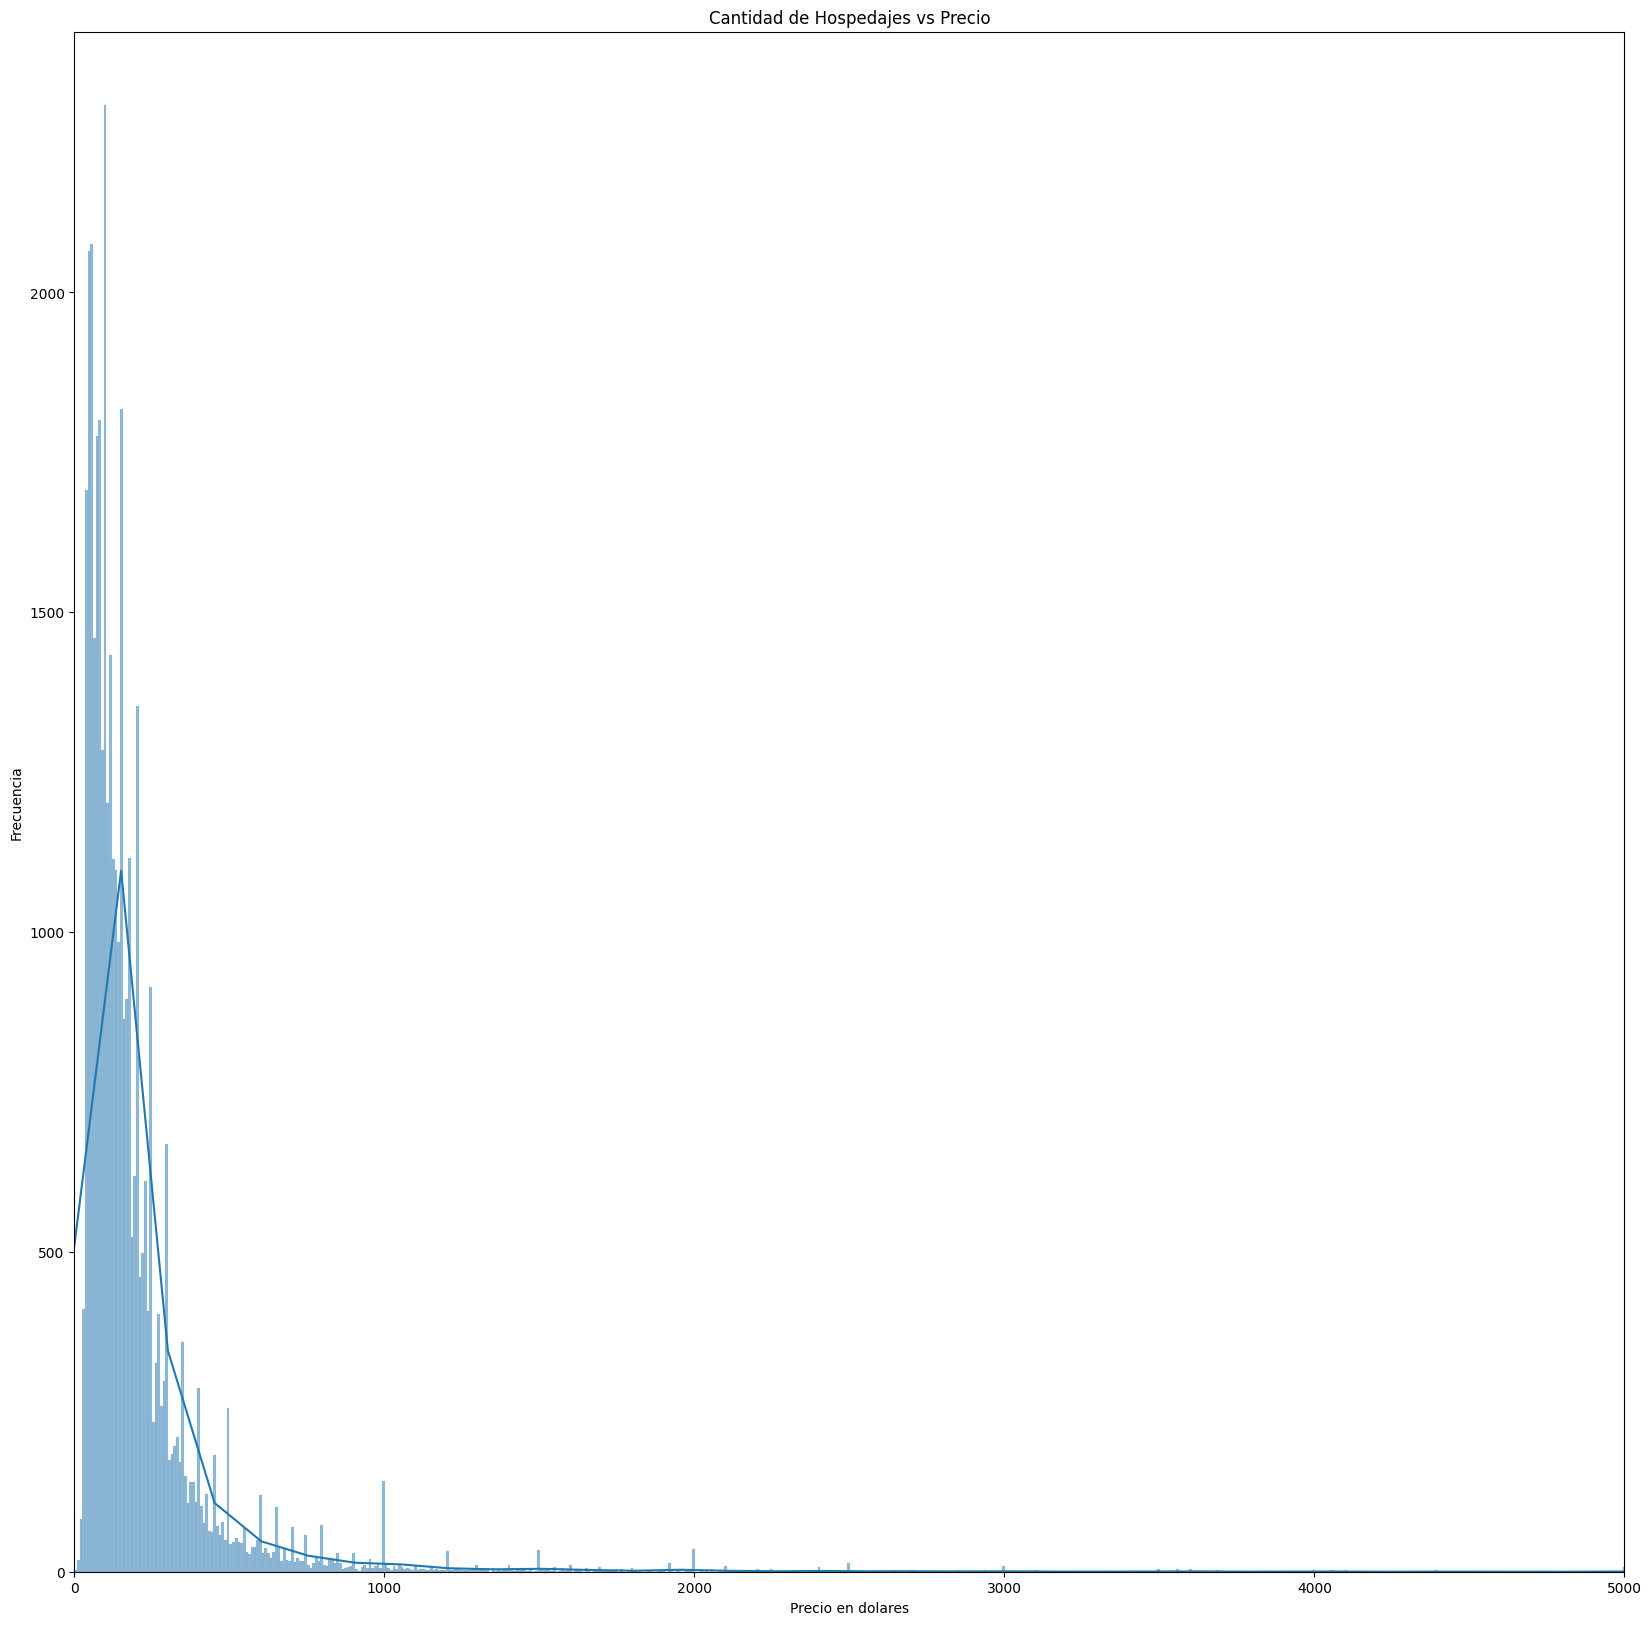

In [ ]:
#Se realiza Zoom para ver con mas detalle los datos
plt.figure(figsize =(20,20))
sns.histplot(data = data, x = 'price' , kde = True)
plt.title('Cantidad de Hospedajes vs Precio')
plt.xlabel('Precio en dolares')
plt.ylabel('Frecuencia')
plt.xlim(0,5000)

In [ ]:
data['price'].describe()

count    38792.000000
mean       215.945891
std        496.013612
min          0.000000
25%         79.000000
50%        135.000000
75%        225.000000
max      30000.000000
Name: price, dtype: float64

In [ ]:
#Usando la gráfica pasada se evidencia que la moda es:
moda_precio = data["price"].mode().values[0]
print(moda_precio)

150


<Axes: xlabel='room_type', ylabel='count'>

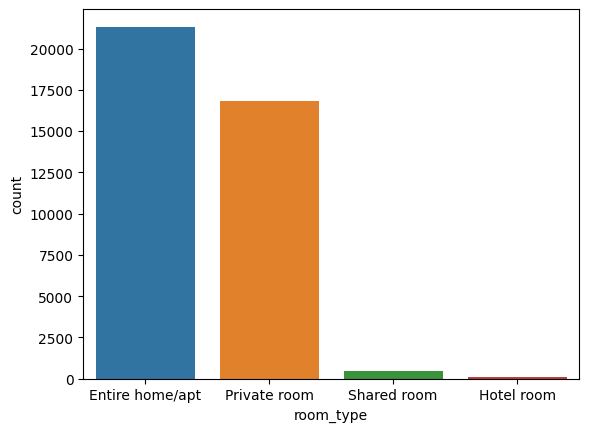

In [ ]:
sns.countplot(data = data, x='room_type')

<Axes: xlabel='price', ylabel='neighbourhood_group'>

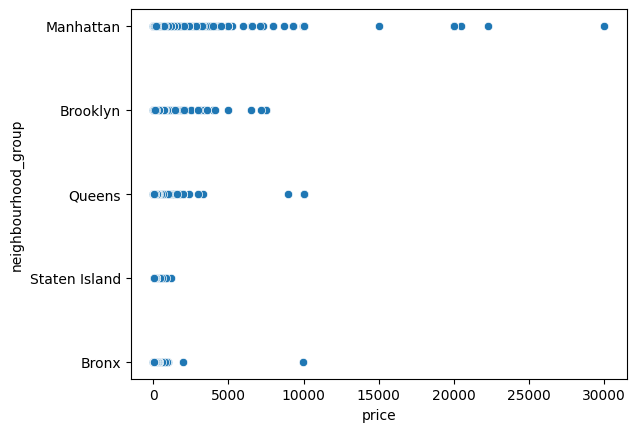

In [ ]:
#Ahora bien, se quiere analizar el tipo de hospedaje vs el barrio.
sns.scatterplot(data = data, x='price', y='neighbourhood_group')
#Donde se evidencia que los más caros son en Manhattan y los más baratos con en el Bronx

<Axes: xlabel='room_type', ylabel='neighbourhood_group'>

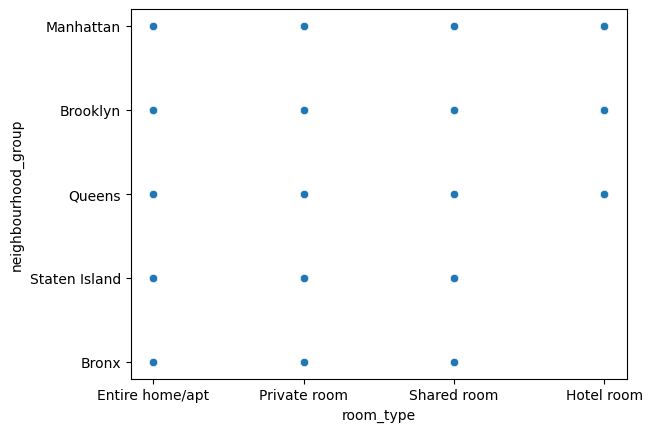

In [ ]:
sns.scatterplot(data = data, x='room_type', y='neighbourhood_group')

<Axes: xlabel='price', ylabel='room_type'>

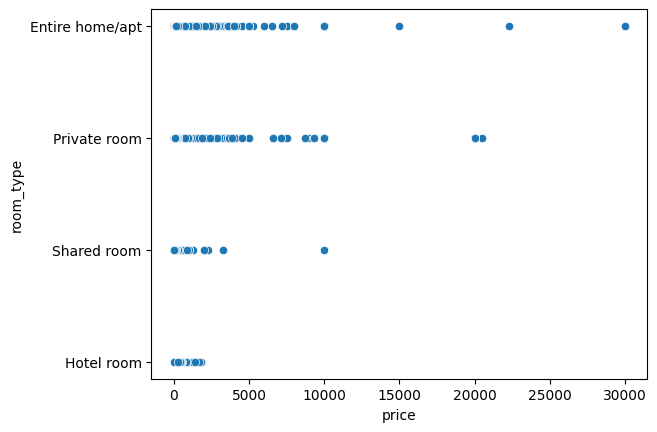

In [ ]:
sns.scatterplot(data = data, x='price', y='room_type')

In [ ]:
correlacion = data.corr()
correlacion

<ipython-input-54-2812bb356113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


id   host_id  latitude  longitude  \
id                              1.000000  0.459676  0.014230   0.069618   
host_id                         0.459676  1.000000  0.034735   0.114766   
latitude                        0.014230  0.034735  1.000000   0.049823   
longitude                       0.069618  0.114766  0.049823   1.000000   
price                           0.084687  0.059020  0.033363  -0.114221   
minimum_nights                 -0.070437 -0.117228 -0.025758   0.029083   
number_of_reviews              -0.217628 -0.082655 -0.051300   0.052115   
reviews_per_month               0.284469  0.278012 -0.052507   0.133807   
calculated_host_listings_count  0.164783  0.020669  0.048601  -0.072612   
availability_365                0.329164  0.264319 -0.015438   0.114675   
number_of_reviews_ltm           0.022923  0.115252 -0.050827   0.100525   

                                   price  minimum_nights  number_of_reviews  \
id                              0.084687       -0.070437          -0.217628   
host_id                         0.059020       -0.117228          -0.082655   
latitude                        0.033363       -0.025758          -0.051300   
longitude                      -0.114221        0.029083           0.052115   
price                           1.000000       -0.041836          -0.023455   
minimum_nights                 -0.041836        1.000000          -0.045196   
number_of_reviews              -0.023455       -0.045196           1.000000   
reviews_per_month               0.024836       -0.091474           0.610610   
calculated_host_listings_count  0.022593        0.062190          -0.134991   
availability_365                0.062633       -0.017048           0.113252   
number_of_reviews_ltm          -0.014680       -0.067605           0.642040   

                                reviews_per_month  \
id                                       0.284469   
host_id                                  0.278012   
latitude                                -0.052507   
longitude                                0.133807   
price                                    0.024836   
minimum_nights                          -0.091474   
number_of_reviews                        0.610610   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.091759   
availability_365                         0.243771   
number_of_reviews_ltm                    0.856914   

                                calculated_host_listings_count  \
id                                                    0.164783   
host_id                                               0.020669   
latitude                                              0.048601   
longitude                                            -0.072612   
price                                                 0.022593   
minimum_nights                                        0.062190   
number_of_reviews                                    -0.134991   
reviews_per_month                                    -0.091759   
calculated_host_listings_count                        1.000000   
availability_365                                      0.075860   
number_of_reviews_ltm                                -0.121518   

                                availability_365  number_of_reviews_ltm  
id                                      0.329164               0.022923  
host_id                                 0.264319               0.115252  
latitude                               -0.015438              -0.050827  
longitude                               0.114675               0.100525  
price                                   0.062633              -0.014680  
minimum_nights                         -0.017048              -0.067605  
number_of_reviews                       0.113252               0.642040  
reviews_per_month                       0.243771               0.856914  
calculated_host_listings_count          0.075860              -0.121518  
availability_365  

<Axes: >

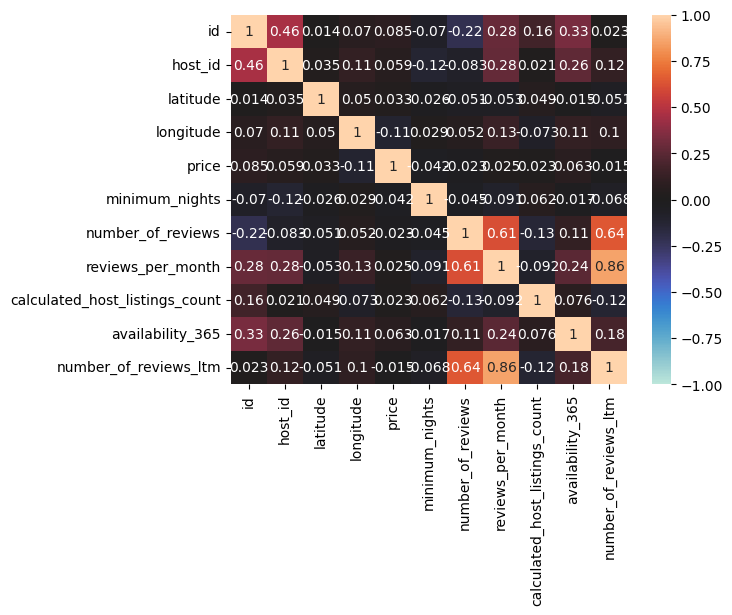

In [ ]:
sns.heatmap(data = correlacion,
             vmin = -1,
             vmax = 1,
            center = 0,
            annot = True)

In [ ]:
name_sep_tab

Where        Stars          Type  Number of Beds  \
0      Rental unit in New York        ★4.68        Studio           1 bed    
1      Rental unit in Brooklyn        ★4.52     1 bedroom            1 bed   
2      Rental unit in Brooklyn        ★4.58    2 bedrooms           1 bed    
3            Condo in New York    1 bedroom         1 bed    1 shared bath   
4             Loft in Brooklyn        ★4.91     1 bedroom           1 bed    
...                         ...          ...           ...             ...   
38787  Rental unit in Brooklyn         ★New     1 bedroom           1 bed    
38788  Rental unit in New York         ★New     1 bedroom           1 bed    
38789  Rental unit in New York         ★New     1 bedroom           1 bed    
38790  Rental unit in New York         ★New    3 bedrooms           1 bed    
38791  Rental unit in New York         ★New     1 bedroom           1 bed    

       Number of baths  
0               1 bath  
1                       
2               1 bath  
3                       
4        1 shared bath  
...                ...  
38787           1 bath  
38788           1 bath  
38789           1 bath  
38790   0 shared baths  
38791           1 bath  

[38792 rows x 5 columns]

In [ ]:
calculo_estrella=[]
calculo_donde=[]
#print(data.shape[0])
i = 0
datos_danados = 0
def contiene_caracter(cadena):
    if "★" in cadena:
        return True
    else:
        return False

while i <= name_sep_tab.shape[0]-1:
      if contiene_caracter(name_sep_tab.loc[i, 'Stars']):
    #print("Yes")
         calculo_estrella.append(name_sep_tab.loc[i, 'Stars'])
         calculo_donde.append(name_sep_tab.loc[i,'Where'])
      else:
    #print("No")
         datos_danados = datos_danados + 1
      i = i + 1

#print(name_sep_tab.shape[0])

In [ ]:
#Dejare esta parte para cuando se vea la limpieza de datos.
print(calculo_estrella)
print(calculo_donde)
print(datos_danados)

print("Se evaluara el " + str((name_sep_tab.shape[0]-datos_danados)/name_sep_tab.shape[0]*100))

[' ★4.68 ', ' ★4.52 ', ' ★4.58 ', ' ★4.91 ', ' ★4.88 ', ' ★4.89 ', ' ★4.77 ', ' ★4.52 ', ' ★4.65 ', ' ★4.39 ', ' ★4.91 ', ' ★4.52 ', ' ★4.65 ', ' ★4.82 ', ' ★4.56 ', ' ★4.56 ', ' ★4.87 ', ' ★5.0 ', ' ★4.79 ', ' ★4.72 ', ' ★4.85 ', ' ★4.80 ', ' ★4.41 ', ' ★5.0 ', ' ★4.95 ', ' ★4.49 ', ' ★4.05 ', ' ★5.0 ', ' ★4.97 ', ' ★4.41 ', ' ★4.83 ', ' ★4.62 ', ' ★4.93 ', ' ★4.85 ', ' ★4.95 ', ' ★4.71 ', ' ★4.94 ', ' ★4.76 ', ' ★4.88 ', ' ★4.71 ', ' ★4.33 ', ' ★4.52 ', ' ★4.84 ', ' ★4.96 ', ' ★5.0 ', ' ★5.0 ', ' ★4.88 ', ' ★4.70 ', ' ★4.83 ', ' ★4.82 ', ' ★4.86 ', ' ★4.93 ', ' ★4.71 ', ' ★4.80 ', ' ★4.81 ', ' ★5.0 ', ' ★4.69 ', ' ★4.64 ', ' ★4.78 ', ' ★4.91 ', ' ★4.42 ', ' ★4.42 ', ' ★4.66 ', ' ★4.71 ', ' ★4.70 ', ' ★4.42 ', ' ★4.97 ', ' ★4.34 ', ' ★4.0 ', ' ★4.71 ', ' ★4.75 ', ' ★4.65 ', ' ★4.35 ', ' ★4.83 ', ' ★4.73 ', ' ★4.67 ', ' ★4.87 ', ' ★4.68 ', ' ★4.83 ', ' ★4.88 ', ' ★4.71 ', ' ★4.67 ', ' ★4.75 ', ' ★4.76 ', ' ★4.39 ', ' ★4.81 ', ' ★4.88 ', ' ★4.84 ', ' ★4.74 ', ' ★5.0 ', ' ★4.53 ', ' ★5.0

In [ ]:
print(type)

(array([2289., 5807., 2059., 2512., 1855., 2483., 1028., 1407., 1254.,
         445.,  305.,  211.,  180., 1960.,   49.,   51.,   22.,   19.,
          17.,   17.]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160.]),
 <BarContainer object of 20 artists>)

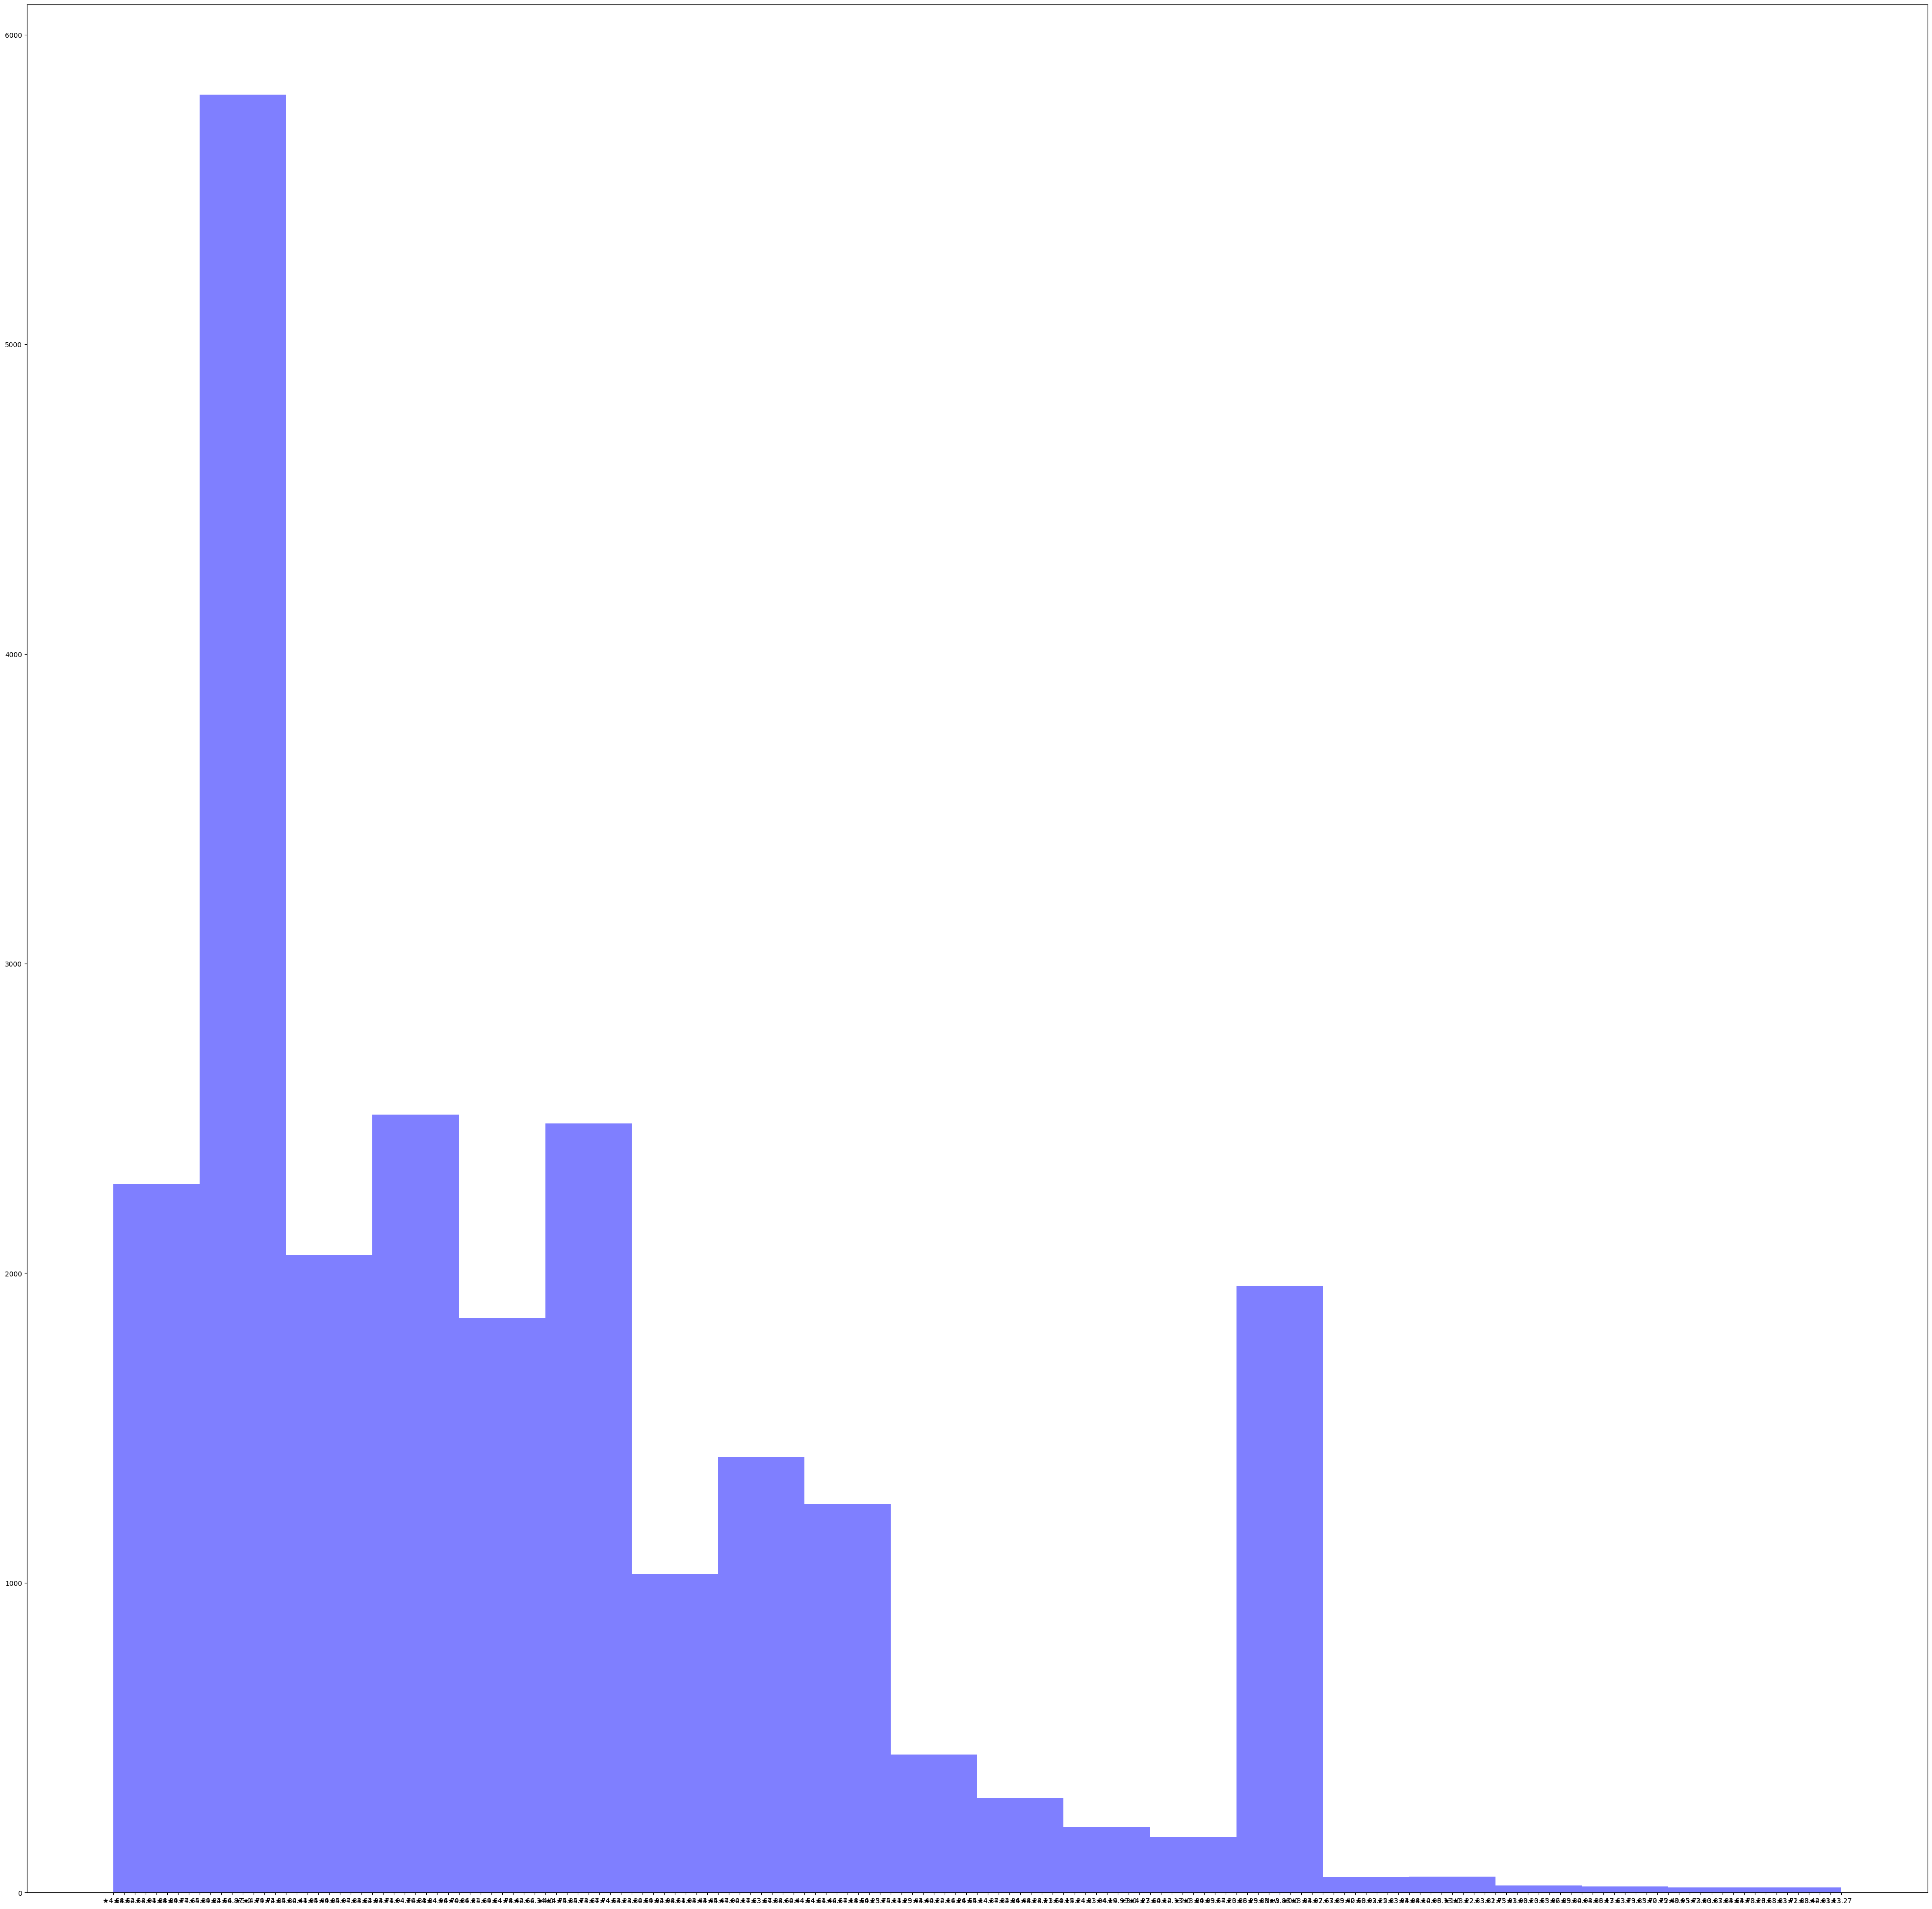

In [ ]:
plt.figure(figsize =(50,50))
plt.hist(calculo_estrella, bins=20, color='blue', alpha=0.5, label='Arreglo 1')

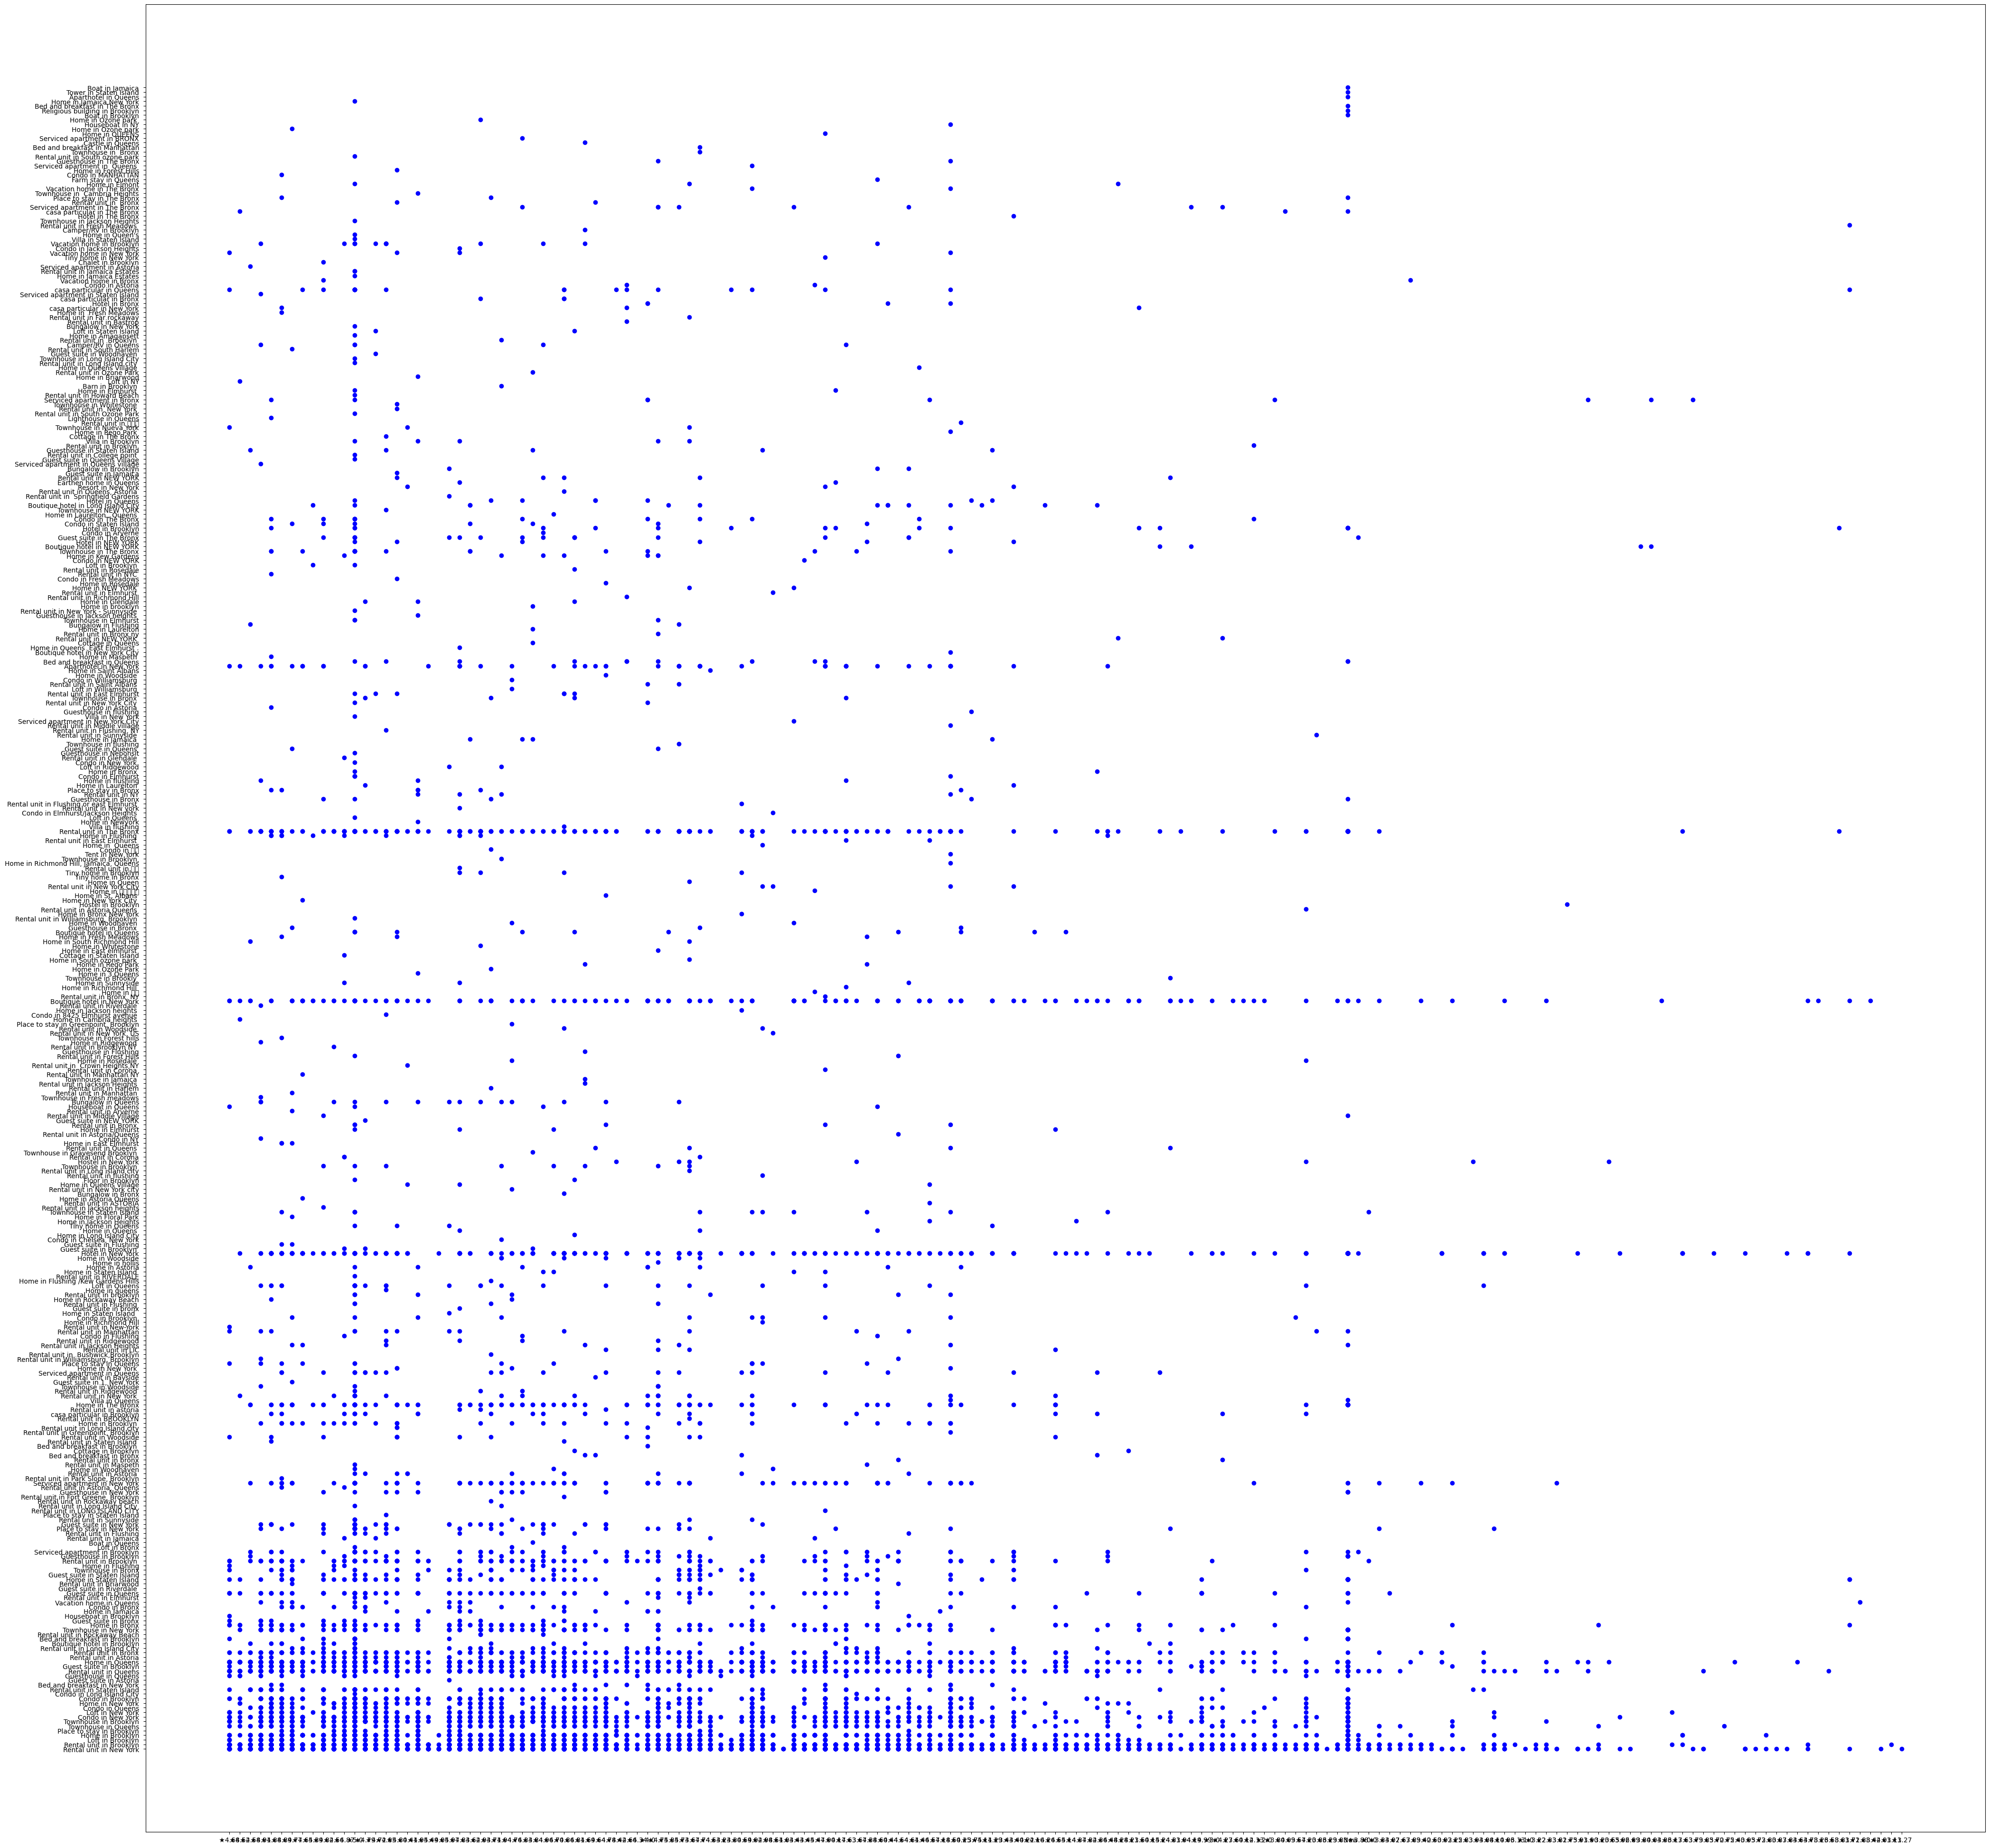

In [ ]:
#Esta gráfica se refinará una vez vea el módulo de limpieza de datos.
plt.figure(figsize =(50,50))
plt.scatter(calculo_estrella,calculo_donde, c='b', marker='o', label='Puntos')

In [ ]:
!pip install -U nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.5.4
    Uninstalling nbconvert-6.5.4:
      Successfully uninstalled nbconvert-6.5.4
